# Week 4: The Binomial Distribution

The binomial distribution is an incredibly useful distribution when working with independent binary outcomes. Following Mackay, it has the following formula 
$$P(r|f, N) = \left({N \atop r}\right) f^{r} (1-f)^{N-r} \tag{eq. 1.1}$$

Where $N$ is the number of trials, $f$ is the probability of a successful trial, and $r$ is the number of successes. $\left({N \atop r}\right)$ is the number of possible ways to get $r$ successes in $N$ trials and is calculated in the following way:

$$\left({N \atop r}\right) = \frac{N!}{(N-r)!r!}\tag{eq. 1.2}$$

Let's consider an example.

Imagine you are flipping a coin 3 times and get 2 heads. You can get this outcome in multiple ways (1 indicates head, 0 indicates tails): (1, 1, 0), (0, 1, 1), and (1, 0, 1) = 3 ways. For small numbers this is pretty easy to count, but it quickly gets unmanageable. 
Let's use the formula for $\left({N \atop r}\right)$ to calculate it.


In [1]:
from scipy.special import comb
import numpy as np
import matplotlib.pyplot as plt
# Number of trials
N = 3
# number of heads
r = 2
# the 'comb' function from scipy.special is an implementation of eq. 1.2
comb(N, r)


3.0

And we get 3, just like we calculated. How about 3 successes in 10 trials?

In [2]:
N = 10
r = 3
comb(N, r)

120.0

Ouch, that would have been painful to count by hand. For illustrative purposes, let's try to plot the number of ways to get 0-10 successes out of 10 trials.

values of r: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
number of combinations: [1.0, 10.0, 45.0, 120.0, 210.0, 252.0, 210.0, 120.0, 45.0, 10.0, 1.0]


<BarContainer object of 11 artists>

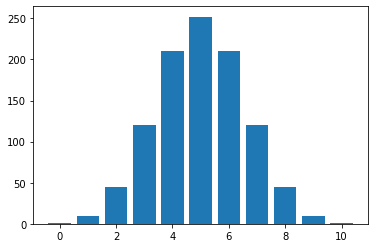

In [3]:
N = 10
# np.linspace creates a sequence of 11 numbers starting 0 and ending at 10
r = np.linspace(0, 10, 11)
print(f"values of r: {r}")
combinations = [comb(N, x) for x in r]
print(f"number of combinations: {combinations}")

plt.bar(r, combinations)

As expected, there are many more ways to get 5 (252) successes than 10 (1) or 9 (10).

Now that we know how the first part of the equation for the binomial distribution works, let's try the whole equation in practice.

To continue with our coin flip example, let's assumme that the coin is fair, so there's a 50% chance of getting heads and 50% change of tails. If we flip it 10 times, what's the probability that we get 1, 3, or 5 heads?

probabilities: [0.00976562500000001, 0.11718750000000014, 0.24609375000000025]


<BarContainer object of 3 artists>

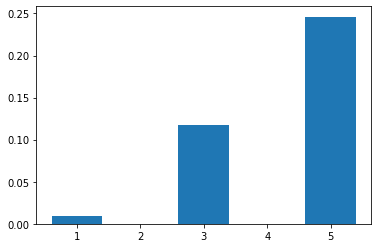

In [4]:
from scipy.stats import binom

N = 10
f = 0.5
r = [1, 3, 5]
# binom.pmf is an implementation of the binomial distribution (eq. 1.1)
prob = [binom.pmf(n_success, N, f) for n_success in r]
print(f"probabilities: {prob}")
plt.bar(r, prob)

probabilities: [0.0009765625, 0.00976562500000001, 0.04394531249999999, 0.11718750000000014, 0.20507812500000022, 0.24609375000000025, 0.20507812500000022, 0.11718750000000014, 0.04394531249999999, 0.00976562500000001, 0.0009765625]


<BarContainer object of 11 artists>

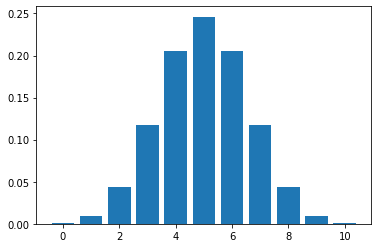

In [5]:
# or for all values between 0 and 10
N = 10
f = 0.5
r = np.linspace(0, 10, 11)

prob = [binom.pmf(n_success, N, f) for n_success in r]
print(f"probabilities: {prob}")
plt.bar(r, prob)

In [6]:
# We can get the mean and variance using binom.stats
mu, vari = binom.stats(N, f)
print(f"mean: {mu}, variance: {vari}")

# We can check that the probabilities sum to one
sum(prob)

mean: 5.0, variance: 2.5


1.0000000000000009

Close enough - rounding errors can happen due to the way python handles floats (ie. numbers with a decimal). What we observe is, that given two equally likely outcomes, we're most likely to get 5 of each in 10 trials with 24.6% probability. Getting only a single heads out of 10 flips is highly unlikely, with only 0.98% probability.

__Exercise:__ Try to change the success rate _f_ and notice how the distribution changes.


probabilities: [0.028247524900000005, 0.12106082100000018, 0.2334744405, 0.26682793200000016, 0.20012094900000013, 0.10291934520000007, 0.03675690899999999, 0.009001692000000002, 0.0014467004999999982, 0.00013778100000000015, 5.904899999999995e-06]


<BarContainer object of 11 artists>

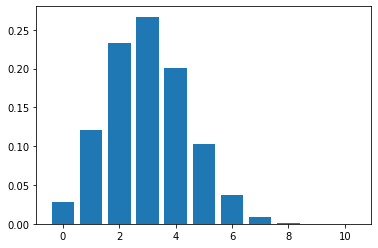

In [9]:
# new f
# or for all values between 0 and 10
N = 10
f = 0.3
r = np.linspace(0, 10, 11)

prob = [binom.pmf(n_success, N, f) for n_success in r]
print(f"probabilities: {prob}")
plt.bar(r, prob)

## Exercises

The functions from scipy are a black box and were only used to show you how the formulas work. __Implement your own functions for eq. 1.1 and 1.2, and use them for the following exercises__. Check the output from your function against scipy's to see if your implementation is correct.

__Exercises__:

1. Use your implementation of the formula for the binomial distribution to find the following probabilities:

    a. P(3| 0.5, 5)

    b. P(1| 0.7, 4)

    c. P(5| 0.3, 10)

2. _Rewritten Mackay exercise 2.4 (p. 27)_: An urn contains _K_ balls, of which _B_ are black and $W = K-B$ are white. Fred draws a ball at random from the urn and replaces it, _N_ times. 

    a. Write the equation for the expectation for the number of times a black ball is drawn.

    b. Write the equations for the variance and standard deviation of the number of times a black ball is drawn.

    c. Calculate the expectation and variance, given $N =5$, $B = 2$, $K = 10$

    d. Calculate the expectation and variance, given $N=400$, $B=2$, $K=10$


3. You are a semi-pro dart player, and hit bull's-eye 60% of the time you aim for it. Your colleague wants to bet you 100 kroner that you can't hit 7 or more bull's eyes in 10 shots. 
    
    a. What is the mean number of bull's eyes you'll hit in 10 trials?

    b. What is the variance and standard deviation?
    
    c. What is the probability that you will win the bet?

    d. Create a histogram of the probabilities of hitting 0 to 10 bull's eyes.

    e. _optional_: What is the probablity of you hitting 5 in a row during the 10 shots?

4. _Rewritten and extended Mackay exercise 1.2 (p. 7)_: Use both Mackay's equation 1.36 (p. 16) and the binomial function you implemented to compute the error probability using R3 for a binary symmetric channel with the following noise levels:

    a. 0.1

    b. 0.4

    c. 0.6

    d. Plot the error probability distribution with _f_ from 0 to 1 in steps of 0.05

    e. Repeat a-d with R5

    f. Plot the error probability for R3-R50 with failure rate 0.4

5. (_extra_). You want to play secret santa with your 22 classmates from Data Science. What is the probability that 1 or more people will draw their own name? 

These have all been _forward probability problems_. When we know the generative model, i.e. the process that gives rise to our data, forward probability allows us to calculate many interesting quantities. However, in practice we're rarely certain of the data generating process and have to approximate using _inferential statistics_ or _inverse probability_. Inferential statistics is the general term for determining an unobserved variable, whereas inverse probability is a special case of inferential statistics that uses Bayesian methods to find the probability distribution of the unobserved variable. Such unobserved variables could for instance be the parameters of a regression model such as the intercept and betas.

It is important to keep in mind, that not all models that you fit to data are generative, and can thus be used for forward probability problems. Many of the most commonly used models such as (frequentist) linear regression, random forest, SVM, and neural networks are not generative (often called _discriminitive models_ instead). Fitting a random forest or neural network to our data does not provide us with a posterior distribution from which we can draw samples and use for tasks such as the ones you have just finished. Some of the most commonly used generative models include Bayesian regression models, naive bayes and Gaussian processes. 


In [10]:
# make binomial distribution
import math 
def b_form(N, r): 
    return(math.factorial(N) / (math.factorial(N-r) * math.factorial(r)))

# make distribution (not quite). 
def b_dist(r, f, N): 
    fact = b_form(N, r) 
    other_thing = (f**r)*((1-f)**(N-r))
    together = fact * other_thing
    return together

In [11]:
# a 
a = b_dist(3, 0.5, 5)

# b
b = b_dist(1, 0.7, 4)

# c 
c = b_dist(5, 0.3, 10)

# return stuff
print(f'a = {a:.3f} \nb = {b:.3f} \nc = {c:.3f}')

a = 0.312 
b = 0.076 
c = 0.103


#### Rewritten Mackay exercise 2.4 (p. 27): An urn contains K balls, of which B are black and  𝑊=𝐾−𝐵  are white. Fred draws a ball at random from the urn and replaces it, N times.

a. Write the equation for the expectation for the number of times a black ball is drawn.

b. Write the equations for the variance and standard deviation of the number of times a black ball is drawn.

c. Calculate the expectation and variance, given  𝑁=5 ,  𝐵=2 ,  𝐾=10 

d. Calculate the expectation and variance, given  𝑁=400 ,  𝐵=2 ,  𝐾=10

#### A 
Let $f = \frac{B}{K}$. 

Then we have from earlier: 
$$P(r|f, N) = \left({N \atop r}\right) f^{r} (1-f)^{N-r} \tag{eq. bigboys}$$
Additionally, we can now see that the expectation is: 
$$E[r] \equiv P(r|f, N) r$$

Variance is defined as: 
$$var[r] \equiv E[r^2] - (E[r])^2$$

Standard deviation (sd): 
$$sd = \sqrt(var)$$

In [12]:
# make functions 
def get_everything(N, B, K):
    
    # for distribution.
    f = B/N 
    var = N*f*(1 - f)
    exp = N*f
    sd = math.sqrt(var)
    return(exp, var, sd)

get_everything(5, 2, 10)

(2.0, 1.2, 1.0954451150103321)

In [13]:
# make functions 
def get_everything(N, B, K):
    
    f = B/K 
    exp = N*f
    var = N*f*(1 - f)
    return(exp, var)


In [14]:
# c + d
get_everything(5, 2, 10) 
get_everything(400, 2, 10)

(80.0, 64.0)

#### You are a semi-pro dart player, and hit bull's-eye 60% of the time you aim for it. Your colleague wants to bet you 100 kroner that you can't hit 7 or more bull's eyes in 10 shots.

a. What is the mean number of bull's eyes you'll hit in 10 trials?

b. What is the variance and standard deviation?

c. What is the probability that you will win the bet?

d. Create a histogram of the probabilities of hitting 0 to 10 bull's eyes.

e. optional: What is the probablity of you hitting 5 in a row during the 10 shots?

In [15]:
# make functions 
def get_more(N, f):
    
    exp = N*f
    var = N*f*(1 - f)
    sd = math.sqrt(var)
    return(exp, var, sd)


In [16]:
# a + b
get_more(10, .6)

(6.0, 2.4000000000000004, 1.5491933384829668)

In [17]:
# probability of win bet. 
def get_dist(N, f): 
    
    exp_dist = [b_dist(i, f, N) for i in range(N+1)]
    return(np.array(exp_dist))

In [18]:
distribution = get_dist(10, .6)

<BarContainer object of 11 artists>

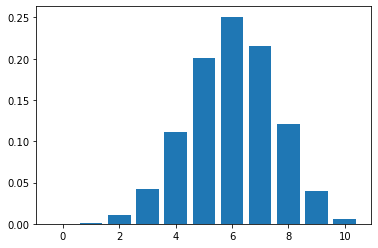

In [19]:
#d. Create a histogram of the probabilities of hitting 0 to 10 bull's eyes.
plt.bar(x = list(range(len(distribution))), height = distribution)

In [20]:
# c. What is the probability that you will win the bet?
distribution[7:].sum()

0.38228060159999994

In [21]:
# e. optional: What is the probablity of you hitting 5 in a row during the 10 shots?


### Combinatorics?
#### Is this just easy?

$$P(b|b|b|b|b)$$

## Introducing: Not understanding math, but understanding computers

In [ ]:
def check_array(arrayz):
    for i in range(6):
        check = arrayz[0+i:5+i]
        if sum(check) == 5:
            return True
    return False

In [56]:
running_sum = 0
for _ in range(100000):
    running_sum += check_array(binom.rvs(1, 0.6, size = 10))
running_sum/100000


0.23301

In [49]:
check_array(checking_binom)

True

### Sending an Image

Can we conceptualize a picture as a matrix, $M$, where $\forall m_i_j \in M: m_i_j = 0  m_i_j = 1$ 

In [7]:
import cv2
import numpy as np

img_path = '/work/SG2/week 4/Emil_logo_tegn.png'
img = cv2.imread(img_path, 0)

ModuleNotFoundError: No module named 'cv2'

In [67]:
img_gray = img / 255

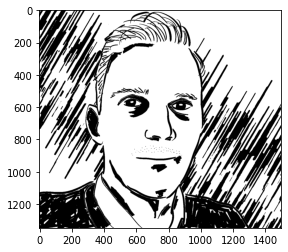

In [72]:
plt.imshow(img_gray, cmap = "gray")

In [115]:
img_gray.shape

bits = np.array([0,1,0,1])

In [120]:
def encoder(t):
    r5 = sum(t[0:3]) % 2
    r6 = sum(t[1:4]) % 2
    r7 = (t[0] + t[2] + t[3]) % 2
    
    return np.append(t, [r5, r6, r7])    

new_bits = encoder(bits)
new_bits

array([0, 1, 0, 1, 1, 0, 1])

In [117]:
import random
def noise(t, f = 0.1):
    n = np.random.binomial(1,f,7)
    return (t + n)%2

In [119]:
r = noise(new_bits)
r

array([1, 1, 0, 1, 1, 0, 0])

##### Parity check matrix

In [121]:
H = np.array([[1, 1, 1, 0, 1, 0, 0],[0, 1, 1, 1, 0, 1, 0], [1, 0, 1, 1, 0, 0, 1]])


In [129]:
def get_syndrome(r):
    return r@H.transpose()%2

z = get_syndrome(r)

In [127]:
def decode(z):
    if np.all(z==np.array([0, 0, 0])):
        n = np.array([0, 0, 0, 0, 0, 0, 0])
    elif np.all(z==np.array([0, 0, 1])):
        n = np.array([0, 0, 0, 0, 0, 0, 1])
    elif np.all(z==np.array([0, 1, 0])):
        n = np.array([0, 0, 0, 0, 0, 1, 0])
    elif np.all(z==np.array([0, 1, 1])):
        n = np.array([0, 0, 0, 1, 0, 0, 0])
    elif np.all(z==np.array([1, 0, 0])):
        n = np.array([0, 0, 0, 0, 1, 0, 0])
    elif np.all(z==np.array([1, 0, 1])):
        n = np.array([1, 0, 0, 0, 0, 0, 0])
    elif np.all(z==np.array([1, 1, 0])):
        n = np.array([0, 1, 0, 0, 0, 0, 0])
    elif np.all(z==np.array([1, 1, 1])):
        n = np.array([0, 0, 1, 0, 0, 0, 0])
    else:
        print("Input is not a valid syndrome")
    return(n)

In [130]:
def get_decode(r, z):
    decoded = (r + decode(z))%2
    return decoded[0:4]

array([1, 1, 0, 1])

In [203]:
def hamming(t, f = 0.1):
    encoding = encoder(t)
    r = noise(encoding, f)
    z = get_syndrome(r)
    return get_decode(r, z)

## Imagine Images

In [205]:
#get shape

def decode_image(img, f, show_image = False, show_org_image = False):
    x, y = img.shape

    b = img.ravel()

    new_img = []

    for i in range(0, len(b), 4):
        new_img.append(hamming(b[0+i:4+i], f))

    flat_list = [item for sublist in new_img for item in sublist]
    
    new_img_array = np.array(flat_list)
    
    new_img_z = new_img_array.reshape((x,y))
    
    if show_image and show_org_image:
        fig, ax = plt.subplots(1, 2)
        
        ax[0].imshow(img_gray, cmap = "gray")
        ax[0].axis("off")
        ax[0].set_title("Original Image")
        ax[1].imshow(new_img_z, cmap = "gray")
        ax[1].axis("off")
        ax[1].set_title("Decoded Image")
        plt.show()
    
    #if show_image:
     #   plt.imshow(new_img_z, cmap = "gray")
    
    return new_img_z

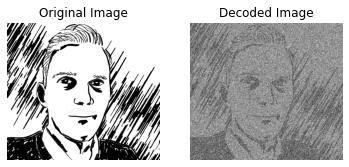

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [206]:
decode_image(img_gray, f = 0.4, show_image = True, show_org_image = True)

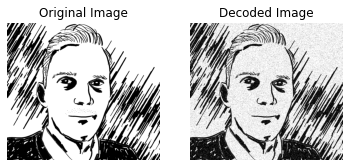

In [202]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img_gray, cmap = "gray")
ax[0].axis("off")
ax[0].set_title("Original Image")
ax[1].imshow(new_img_z, cmap = "gray")
ax[1].axis("off")
ax[1].set_title("Decoded Image")
plt.show()